In [ ]:
#Cargado de datos
import pandas as pd

file_path = '/content/GBvideos_cc50_202101.csv'

df = pd.read_csv(file_path)

print(df.head())

      video_id trending_date  \
0  Jw1Y-zhQURU      17.14.11   
1  3s1rvMFUweQ      17.14.11   
2  n1WpP7iowLc      17.14.11   
3  PUTEiSjKwJU      17.14.11   
4  rHwDegptbI4      17.14.11   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                     

In [ ]:
# Mostrar la cantidad de filas y columnas en el DataFrame
print("\nCantidad de filas y columnas en el DataFrame:")
print(df.shape)


Cantidad de filas y columnas en el DataFrame:
(38916, 20)


In [ ]:
#Mostrar los datos faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes en cada columna:")
print(missing_values)


Valores faltantes en cada columna:
video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               612
state                       0
lat                         0
lon                         0
geometry                    0
dtype: int64


In [ ]:
# Eliminar filas con valores faltantes en 'description'
df_clean = df.dropna(subset=['description'])

In [ ]:
# Mostrar la cantidad de filas y columnas en el DataFrame
print("\nCantidad de filas y columnas en el DataFrame:")
print(df_clean.shape)


Cantidad de filas y columnas en el DataFrame:
(38304, 20)


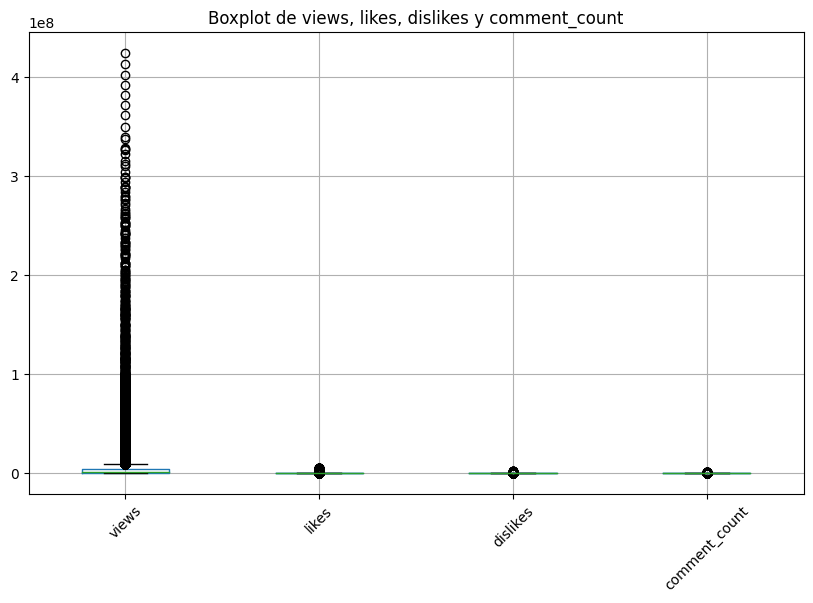

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes para el análisis de outliers
columnas_relevantes = ['views', 'likes', 'dislikes', 'comment_count']
df_relevantes = df_clean[columnas_relevantes]

# Crear un gráfico de caja para las columnas seleccionadas
plt.figure(figsize=(10, 6))
df_relevantes.boxplot()
plt.title('Boxplot de views, likes, dislikes y comment_count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Seleccionar las columnas relevantes para la verificación de números negativos
columnas_relevantes = ['views', 'likes', 'dislikes', 'comment_count']

# Verificar si hay números negativos en las columnas seleccionadas
for columna in columnas_relevantes:
    negativos = df_clean[df_clean[columna] < 0]
    cantidad_negativos = len(negativos)
    if cantidad_negativos > 0:
        print(f"Se encontraron {cantidad_negativos} números negativos en la columna {columna}.")
    else:
        print(f"No se encontraron números negativos en la columna {columna}.")

No se encontraron números negativos en la columna views.
No se encontraron números negativos en la columna likes.
No se encontraron números negativos en la columna dislikes.
No se encontraron números negativos en la columna comment_count.


In [ ]:
# Convertir la columna 'trending_date' a formato de fecha
df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format='%y.%d.%m')
print(df_clean.head())

      video_id trending_date  \
0  Jw1Y-zhQURU    2017-11-14   
1  3s1rvMFUweQ    2017-11-14   
2  n1WpP7iowLc    2017-11-14   
3  PUTEiSjKwJU    2017-11-14   
4  rHwDegptbI4    2017-11-14   

                                               title  \
0      John Lewis Christmas Ad 2017 - #MozTheMonster   
1          Taylor Swift: …Ready for It? (Live) - SNL   
2         Eminem - Walk On Water (Audio) ft. Beyoncé   
3  Goals from Salford City vs Class of 92 and Fri...   
4  Dashcam captures truck's near miss with child ...   

                channel_title  category_id              publish_time  \
0                  John Lewis           26  2017-11-10T07:38:29.000Z   
1         Saturday Night Live           24  2017-11-12T06:24:44.000Z   
2                  EminemVEVO           10  2017-11-10T17:00:03.000Z   
3  Salford City Football Club           17  2017-11-13T02:30:38.000Z   
4            Cute Girl Videos           25  2017-11-13T01:45:13.000Z   

                                     

<ipython-input-120-f1e08dd30921>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'], format='%y.%d.%m')


In [ ]:
import json

with open('/content/GB_category_id.json') as f:
    data = json.load(f)

category_dict_json = {int(item['id']): item['snippet']['title'] for item in data['items']}

df_clean['category_name'] = df_clean['category_id'].map(category_dict_json)

print(df_clean[['category_id', 'category_name']].head(10))

   category_id    category_name
0           26    Howto & Style
1           24    Entertainment
2           10            Music
3           17           Sports
4           25  News & Politics
5           24    Entertainment
6           10            Music
7           22   People & Blogs
8           10            Music
9           10            Music


<ipython-input-121-6d0716168591>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['category_name'] = df_clean['category_id'].map(category_dict_json)


In [ ]:
# Mostrar la cantidad de filas y columnas en el DataFrame
print("\nCantidad de filas y columnas en el DataFrame:")
print(df_clean.shape)


Cantidad de filas y columnas en el DataFrame:
(38304, 21)


In [131]:
#Guardamos el df_clean
df_clean.to_csv('df_clean.csv', index=False)

print("DataFrame limpio guardado exitosamente como df_clean.csv")

DataFrame limpio guardado exitosamente como df_clean.csv


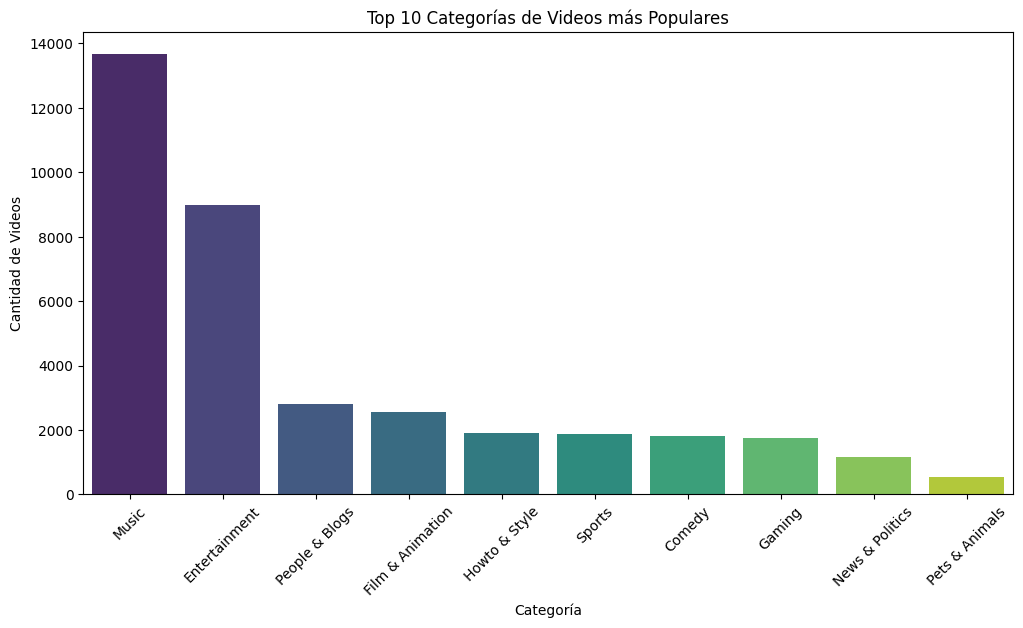

In [132]:
import seaborn as sns

categorias_populares = df_clean['category_name'].value_counts().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=categorias_populares.index, y=categorias_populares.values, palette="viridis")
plt.title('Top 10 Categorías de Videos más Populares')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.show()

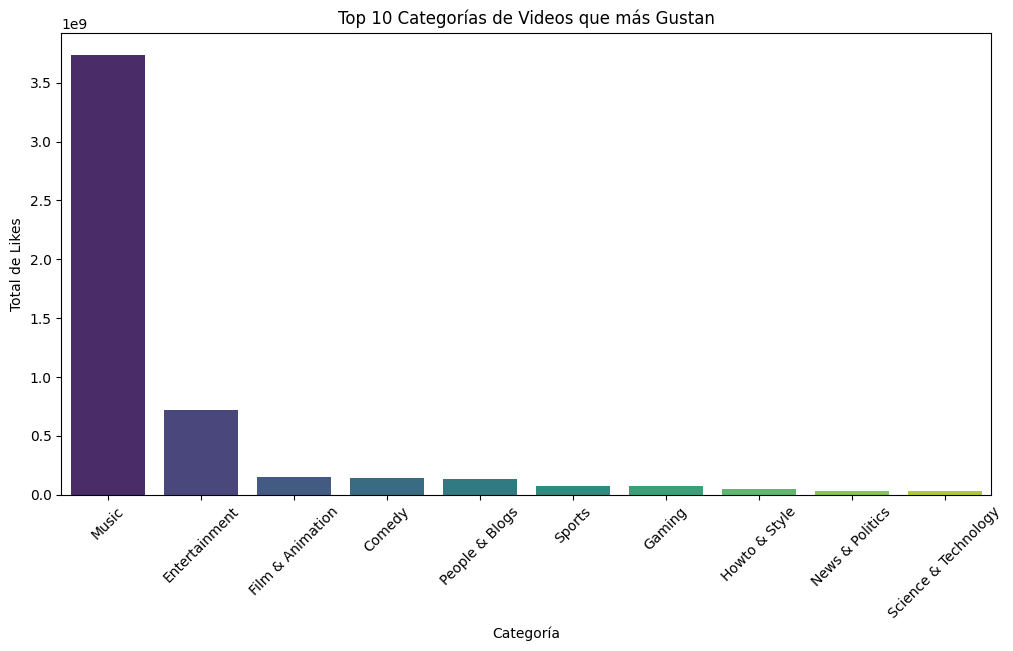

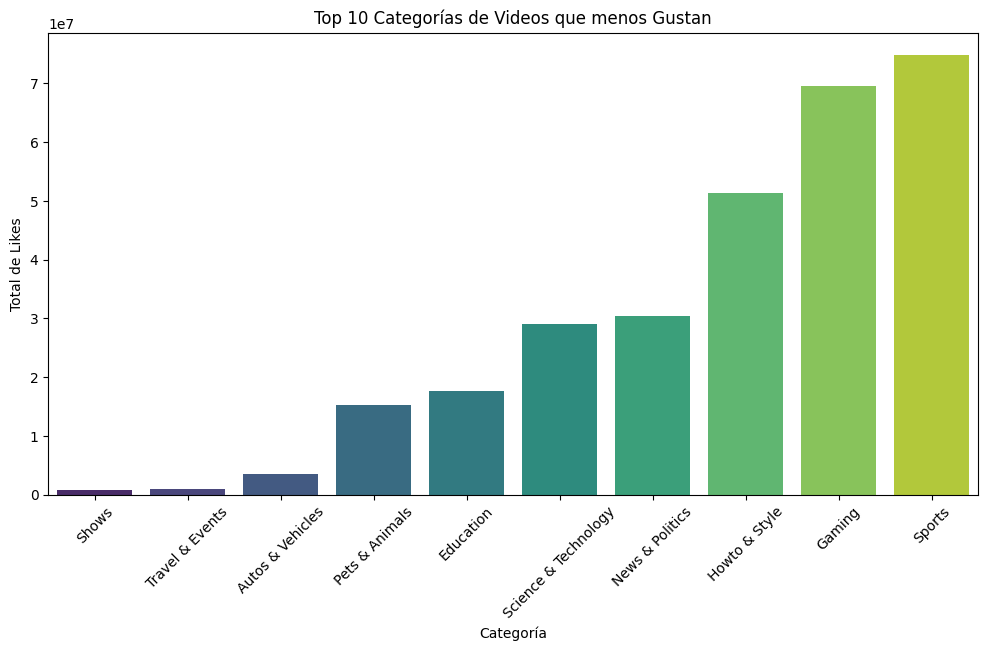

In [ ]:
# Calcular las categorías con más "likes" y las que menos "likes"
categorias_mas_gustan = df_clean.groupby('category_name')['likes'].sum().nlargest(10)
categorias_menos_gustan = df_clean.groupby('category_name')['likes'].sum().nsmallest(10)

# Crear gráfico de barras para las categorías que más gustan
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_mas_gustan.index, y=categorias_mas_gustan.values, palette="viridis")
plt.title('Top 10 Categorías de Videos que más Gustan')
plt.xlabel('Categoría')
plt.ylabel('Total de Likes')
plt.xticks(rotation=45)
plt.show()

# Crear gráfico de barras para las categorías que menos gustan
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_menos_gustan.index, y=categorias_menos_gustan.values, palette="viridis")
plt.title('Top 10 Categorías de Videos que menos Gustan')
plt.xlabel('Categoría')
plt.ylabel('Total de Likes')
plt.xticks(rotation=45)
plt.show()

<ipython-input-125-86d984c1d3d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ratio_likes_dislikes'] = df_clean['likes'] / df_clean['dislikes']


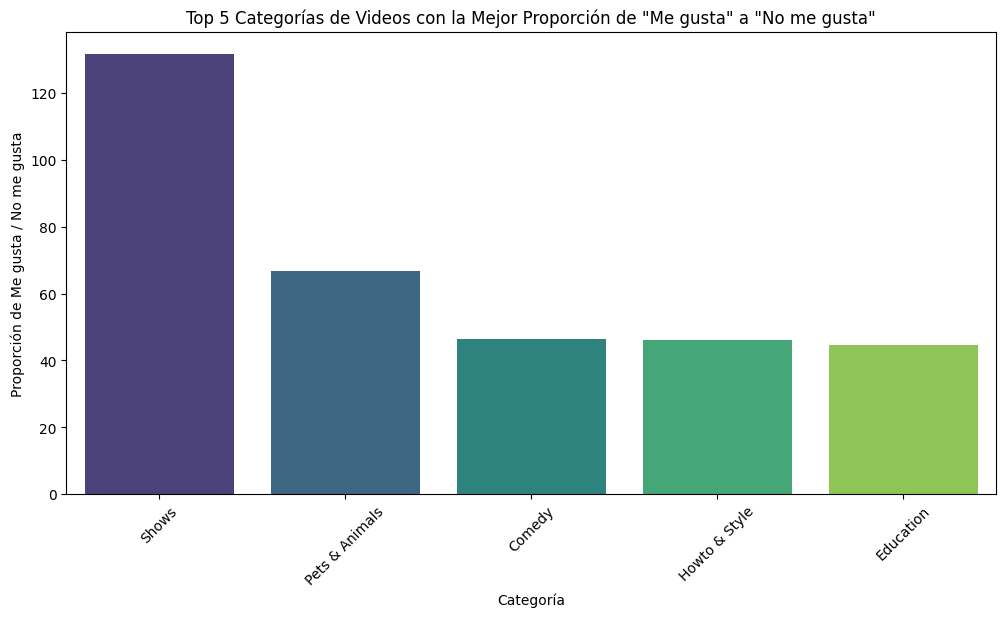

In [ ]:
# Calcular la proporción de "Me gusta" a "No me gusta" para cada categoría
df_clean['ratio_likes_dislikes'] = df_clean['likes'] / df_clean['dislikes']
categorias_mejor_proporcion = df_clean.groupby('category_name')['ratio_likes_dislikes'].mean().nlargest(5)

# Crear gráfico de barras para las categorías con la mejor proporción de "Me gusta" a "No me gusta"
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_mejor_proporcion.index, y=categorias_mejor_proporcion.values, palette="viridis")
plt.title('Top 5 Categorías de Videos con la Mejor Proporción de "Me gusta" a "No me gusta"')
plt.xlabel('Categoría')
plt.ylabel('Proporción de Me gusta / No me gusta')
plt.xticks(rotation=45)
plt.show()

<ipython-input-126-35c286ca537e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ratio_views_comments'] = df_clean['views'] / df_clean['comment_count']


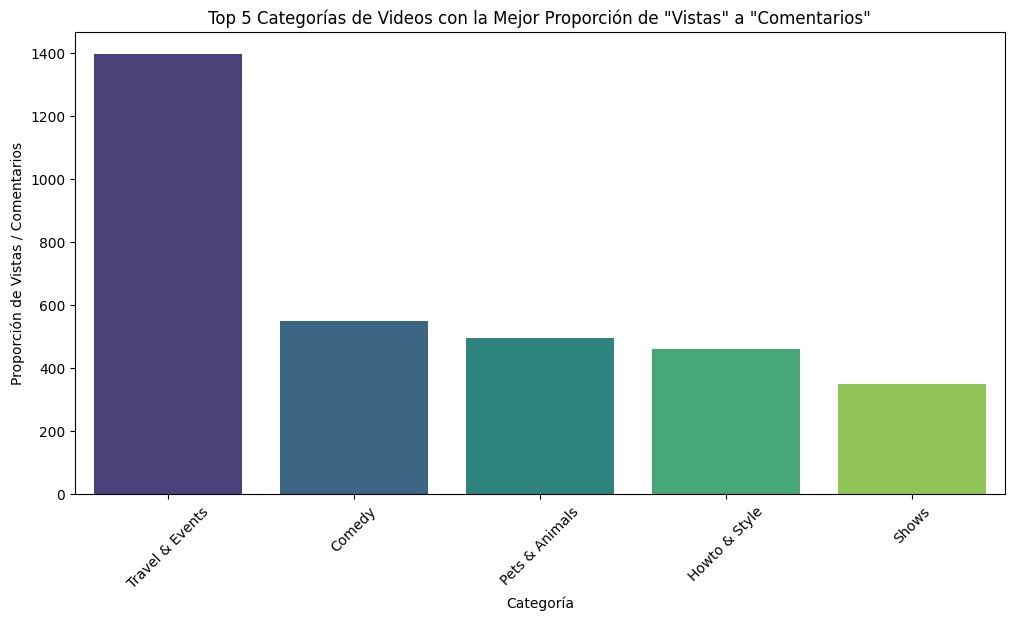

In [ ]:
# Calcular la proporción de "Vistas" a "Comentarios" para cada categoría
df_clean['ratio_views_comments'] = df_clean['views'] / df_clean['comment_count']
categorias_mejor_proporcion_vc = df_clean.groupby('category_name')['ratio_views_comments'].mean().nlargest(5)

# Crear gráfico de barras para las categorías con la mejor proporción de "Vistas" a "Comentarios"
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_mejor_proporcion_vc.index, y=categorias_mejor_proporcion_vc.values, palette="viridis")
plt.title('Top 5 Categorías de Videos con la Mejor Proporción de "Vistas" a "Comentarios"')
plt.xlabel('Categoría')
plt.ylabel('Proporción de Vistas / Comentarios')
plt.xticks(rotation=45)
plt.show()

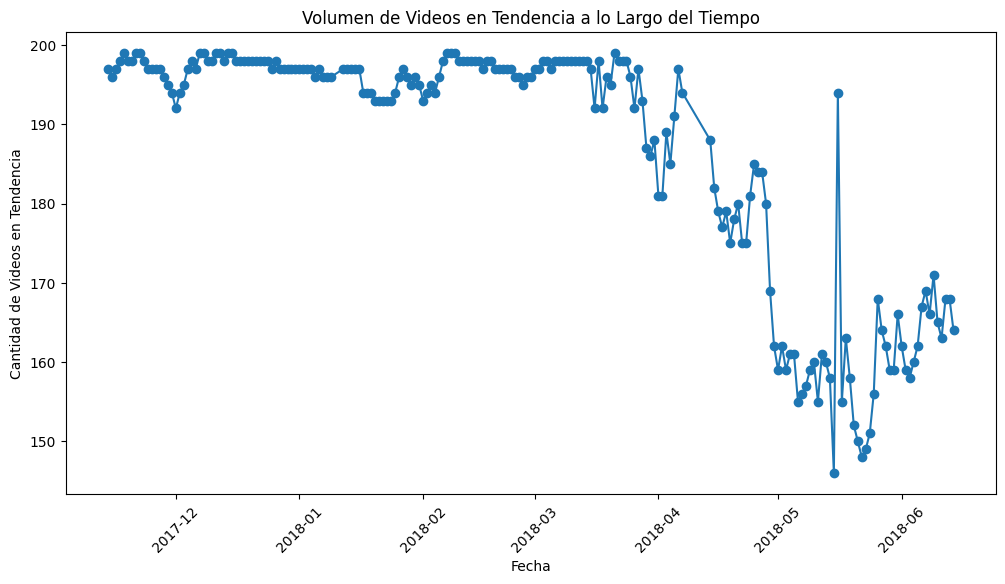

In [ ]:
# Contar la cantidad de videos en tendencia por fecha
volumen_videos_por_fecha = df_clean['trending_date'].value_counts().sort_index()

# Crear un gráfico de líneas para visualizar el volumen de videos en tendencia a lo largo del tiempo
plt.figure(figsize=(12,6))
plt.plot(volumen_videos_por_fecha.index, volumen_videos_por_fecha.values, marker='o', linestyle='-')
plt.title('Volumen de Videos en Tendencia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Videos en Tendencia')
plt.xticks(rotation=45)
plt.show()

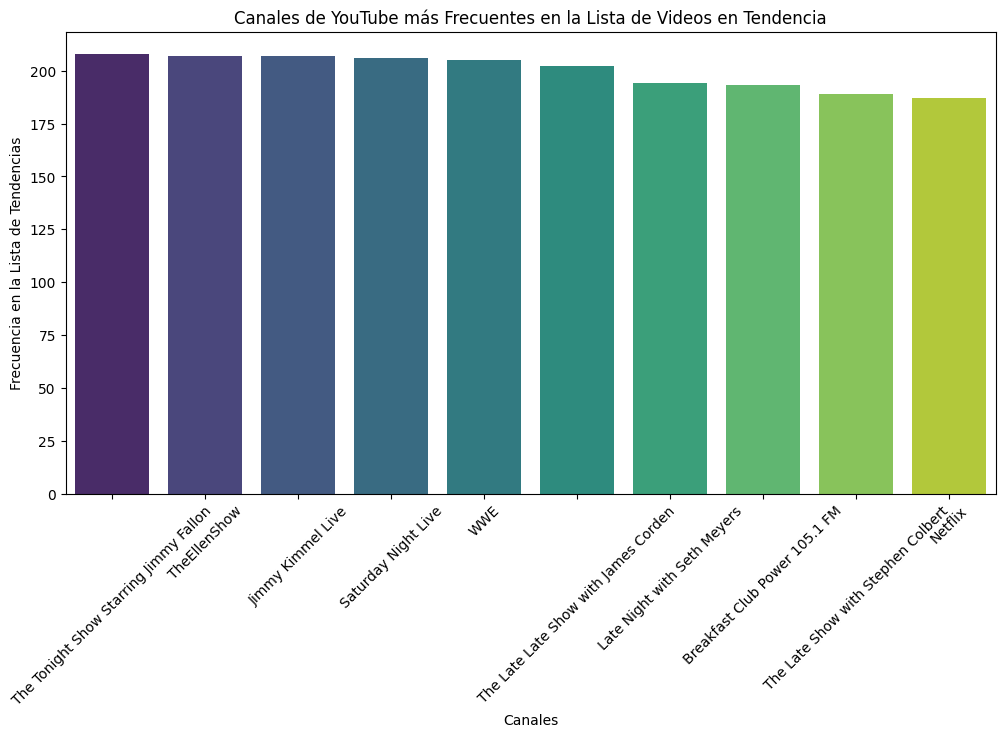

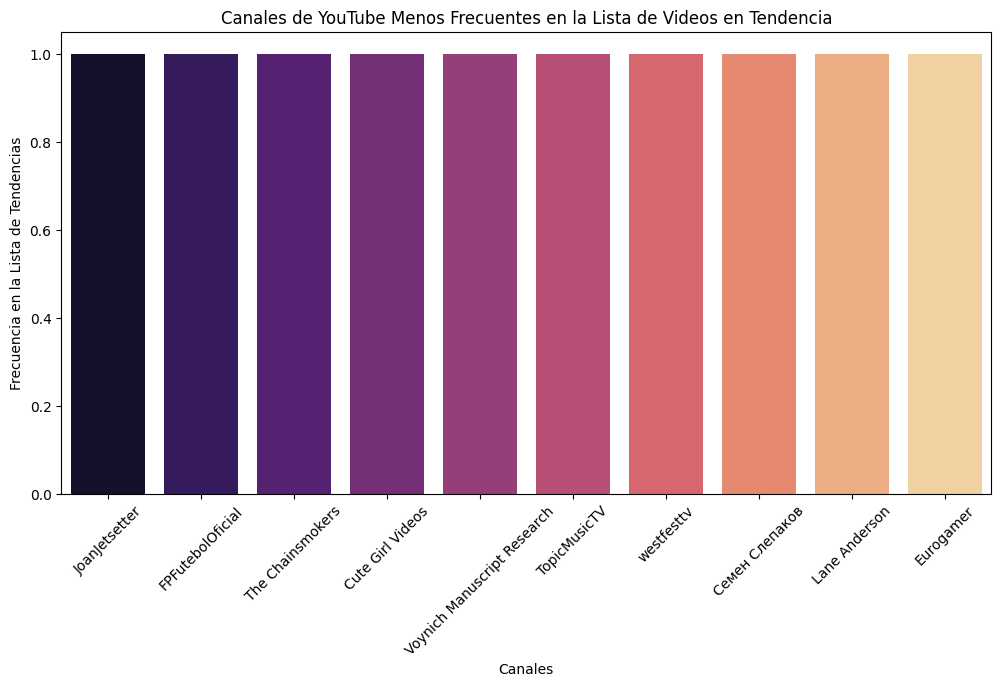

In [ ]:
# Contar la frecuencia de los canales en la lista de videos en tendencia
canales_frecuentes = df_clean['channel_title'].value_counts().nlargest(10)
canales_menos_frecuentes = df_clean['channel_title'].value_counts().nsmallest(10)

# Crear gráfico de barras para los canales más frecuentes con colores distintos
plt.figure(figsize=(12,6))
sns.barplot(x=canales_frecuentes.index, y=canales_frecuentes.values, palette="viridis")
plt.title('Canales de YouTube más Frecuentes en la Lista de Videos en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia en la Lista de Tendencias')
plt.xticks(rotation=45)
plt.show()

# Crear gráfico de barras para los canales menos frecuentes con colores distintos
plt.figure(figsize=(12,6))
sns.barplot(x=canales_menos_frecuentes.index, y=canales_menos_frecuentes.values, palette="magma")
plt.title('Canales de YouTube Menos Frecuentes en la Lista de Videos en Tendencia')
plt.xlabel('Canales')
plt.ylabel('Frecuencia en la Lista de Tendencias')
plt.xticks(rotation=45)
plt.show()

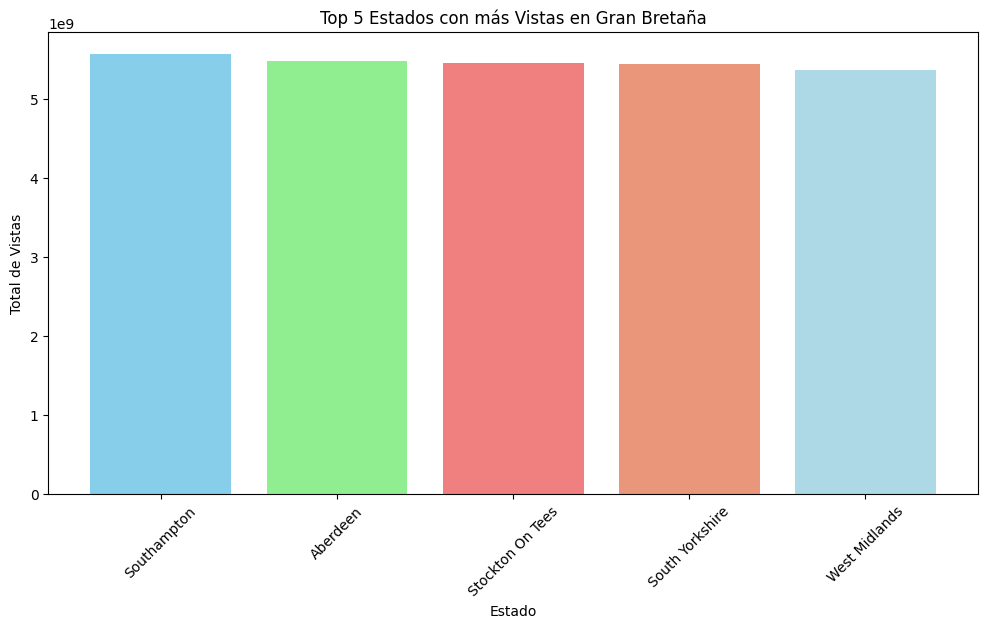

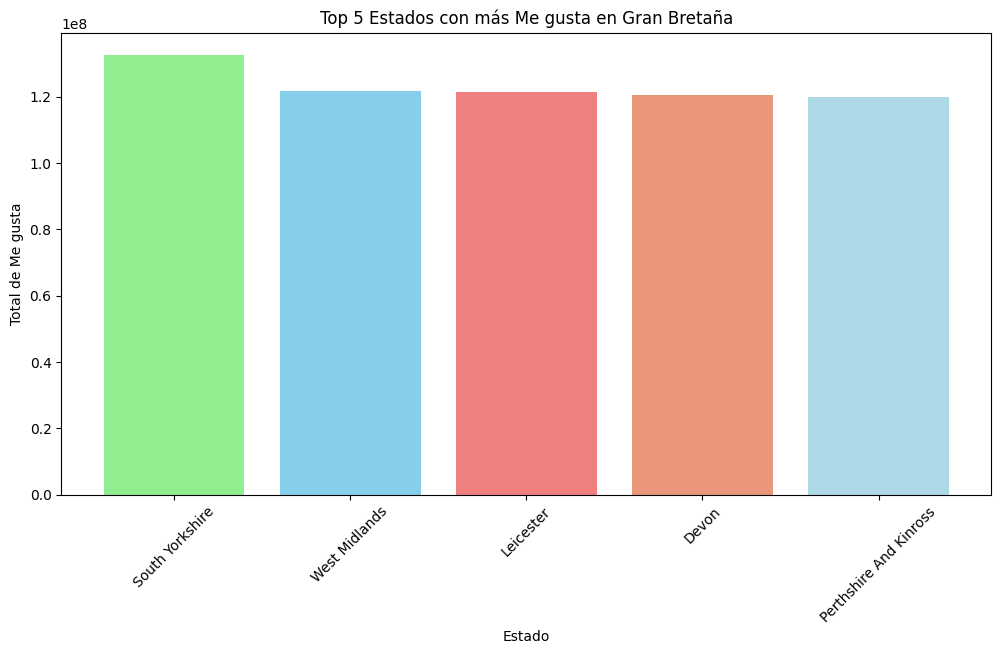

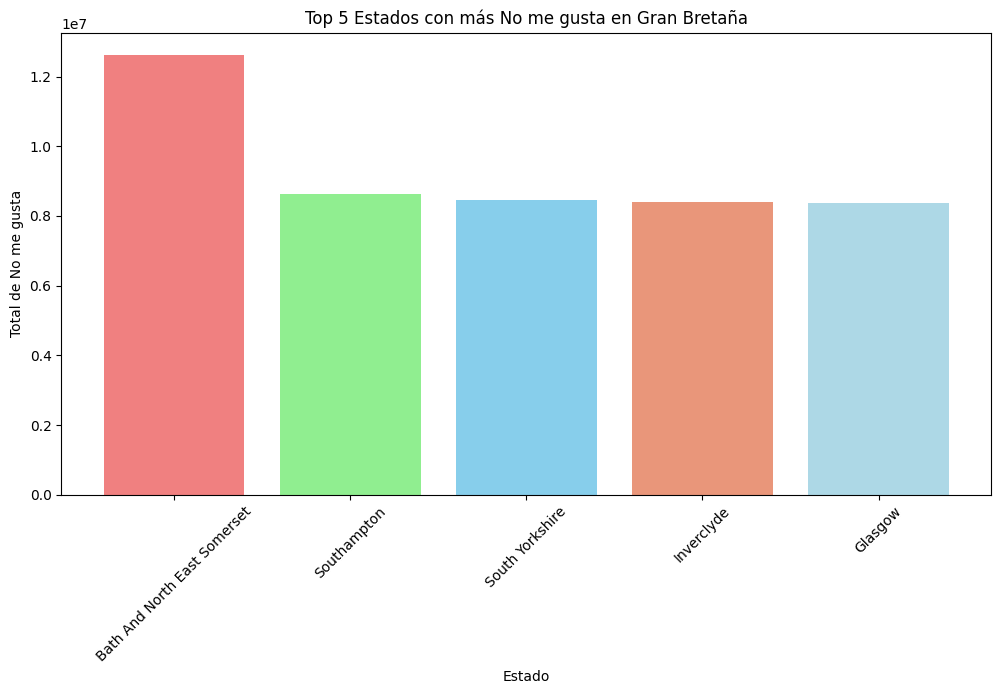

In [ ]:
# Calcular el total de vistas, me gusta y no me gusta por estado
total_vistas_por_estado = df.groupby('state')['views'].sum().reset_index().sort_values('views', ascending=False).head(5)
total_likes_por_estado = df.groupby('state')['likes'].sum().reset_index().sort_values('likes', ascending=False).head(5)
total_dislikes_por_estado = df.groupby('state')['dislikes'].sum().reset_index().sort_values('dislikes', ascending=False).head(5)

# Crear gráficos de barras para los estados con el mayor número de vistas, me gusta y no me gusta
plt.figure(figsize=(12, 6))
colors = ['skyblue', 'lightgreen', 'lightcoral', 'darksalmon', 'lightblue']
plt.bar(total_vistas_por_estado['state'], total_vistas_por_estado['views'], color=colors)
plt.title('Top 5 Estados con más Vistas en Gran Bretaña')
plt.xlabel('Estado')
plt.ylabel('Total de Vistas')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
colors = ['lightgreen', 'skyblue', 'lightcoral', 'darksalmon', 'lightblue']
plt.bar(total_likes_por_estado['state'], total_likes_por_estado['likes'], color=colors)
plt.title('Top 5 Estados con más Me gusta en Gran Bretaña')
plt.xlabel('Estado')
plt.ylabel('Total de Me gusta')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
colors = ['lightcoral', 'lightgreen', 'skyblue', 'darksalmon', 'lightblue']
plt.bar(total_dislikes_por_estado['state'], total_dislikes_por_estado['dislikes'], color=colors)
plt.title('Top 5 Estados con más No me gusta en Gran Bretaña')
plt.xlabel('Estado')
plt.ylabel('Total de No me gusta')
plt.xticks(rotation=45)
plt.show()